### Mollie Panter-Downes' "Good Evening, Mrs. Craven"


This notebook analyzes 21 short stories written by Mollie Panter-Downes suring WWII

First, necessary libraries

In [4]:
#%matplotlib widget
import os
import nltk
import csv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
nltk.download('vader_lexicon')
from scipy.stats import zscore
from scipy.stats import pearsonr
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk import Text
from nltk.corpus import stopwords
sentiment_analyzer = SentimentIntensityAnalyzer()
from tqdm import tqdm
import spacy
nlp = spacy.load('en_core_web_sm', disable = ['parser', 'ner']) # Initialize spacy 'en' model, keeping only tagger component needed 
import gensim
import re
from semanticfield import war_semantic_field
from gensim.models import Word2Vec

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/felix/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In a separate file TextAnalyzer was written for the analysis of the major text metrics.

In [5]:
from textanalyzer import TextAnalyzer, metrics

There is the list of files, containing 21 short stories.

In [6]:
titles = os.listdir('/home/felix/my python projects/Mollie-Panter-Donwnes-wartime-short-stories/Good Evening, Mrs. Craven texts')
ordered_titles = sorted(titles, key=lambda t: int(t.split('. ')[0]))

Function for extracting metrics

Then, short stories are extracted from their files, major metrics are analyzed and written into a different .csv-file.

In [7]:
all_texts_as_str = []
file_w = open ('text metrics.csv', mode = 'w', encoding='utf-8')
file_writer = csv.writer(file_w, delimiter = ";", lineterminator="\r")
file_writer.writerow(['title','number of words', 'number of sentences',
                    'number of unique words', 'number of paragraphs',
                    'average word length', 'average sentence length',
                    'average paragraph length in sentences',
                    'average paragraph length in words',
                    'sentiment negative', 'sentiment neutral',
                    'sentiment positive', 'sentiment compound'])
for title in tqdm(ordered_titles):
    f = open (f'Good Evening, Mrs. Craven texts/{title}', encoding='utf-8')
    short_story = f.read()
    all_texts_as_str.append(short_story)
    text_metrics = metrics(short_story)
    text_metrics.insert(0, title[:-4])
    file_writer.writerow(text_metrics)
    f.close()
file_w.close()

 14%|█▍        | 3/21 [00:00<00:02,  6.68it/s]

100%|██████████| 21/21 [00:04<00:00,  4.82it/s]


In [8]:
titles_for_graphs = ["Date with Romance", "Meeting at the Pringles'", "Mrs. Ramsay's War", "In Clover", " It's the Real Thing...",
                     "This Flower, Safety", "As the Fruitful Vine", "Lunch with Mr. Biddle", "Battle of the Greeks",
                     "Fin de Siecle", "Literary Scandal...", "Goodbye, My Love", "War Among Strangers", "Combined Operations",
                     "Good Evening, Mrs. Craven", "The Hunger of Miss Burton", "It's the Reaction", "Cut down the Trees",
                     "Year of Decision", "The Danger", "The Waste of it All"
]

We analyzed several key textual metrics listed below:
1. Number of words. This is a plain texts' length in word as it considered as any characters bondered with spaces. Contracted and conjugated forms are not count as separate words.
2. Number od sentences. Sentence is considered as a sequence of words completed with sentence end punctuation.
3. Number of unique words. Number of unique lemmatized tokens. In this count the indents of contracyed forms ('s, 'd, 're, etc.) are listed as individual words.
4. Number of paragraphs. Dialogue lines considered as independent paragraphs.
5. Average word length counted as number of characters in each word as token in (1).
6. Average sentence length counts as a number of words in sentence.
7. Average paragraph length in sentences. Number of sentences in each paragraph.
8. Average paragraph length in words. Number of words in each paragraph.
9. Sentiment negative, neutal (10), positive (11) and compound (12) are outcomes of NLTK-integrated VADER (Valence Aware Dictionary for sEntiment Reasoning).\
VADER is a model, presented in 2014 by Hutto and Gilbert, which is able to evaluate both polarity of sentiment (positive or negative) and its intensity (in numbers). Among two major existing approaches towards sentiment analysis, lexical and statistical models, VADER is dictionary based. It contains a dictionary of sentiment listing about 7500 lexical items evaluated in scale from -4 to +4 (slightly, moderately, very and extremely positive or negative or neutal - 0). In addition to the dictionary of sentiment VADER formulates 5 rules which consider facts in text, affecting on sentiment. For the total sentiment of the text VADER normalizes which limits the overall score in interval between -1 and 1. The total score of positive, negative and neutral sentiments is 1 and represents the sentiment of sentiment dictionary used in the analyzed text. Compound sentiment is "computed by summing the valence scores of each word in the lexicon, adjusted according to the rules, and then normalized to be between -1 (most extreme negative) and +1 (most extreme positive)" [2].
+ varify why this model the article uses the model

In [9]:
compound_table = pd.read_csv('text metrics.csv', index_col='title', sep=";")
compound_table

,number of words,number of sentences,number of unique words,number of paragraphs,average word length,average sentence length,average paragraph length in sentences,average paragraph length in words,sentiment negative,sentiment neutral,sentiment positive,sentiment compound
title,,,,,,,,,,,,
1. Date with Romance,1301,76,485,22,5.515757,17.118421,3.454545,59.136364,0.057,0.825,0.118,0.9978
2. Meeting at the Pringles',1624,85,519,36,5.487685,19.105882,2.361111,45.111111,0.075,0.821,0.104,0.9956
3. Mrs. Ramsay's War,1317,52,481,24,5.599089,25.326923,2.166667,54.875000,0.070,0.822,0.109,0.9937
4. In Clover,1669,66,564,21,5.517076,25.287879,3.142857,79.476190,0.094,0.789,0.117,0.9939
5. It's the Real Thing This Time,1281,45,517,9,5.442623,28.466667,5.000000,142.333333,0.100,0.790,0.110,0.9534
"6. This Flower, Safety",2043,81,715,24,5.641214,25.222222,3.375000,85.125000,0.085,0.818,0.097,0.9865
7. As the Fruitful Vine,1802,76,625,20,5.502775,23.710526,3.800000,90.100000,0.087,0.765,0.148,0.9988
8. Lunch with Mr. Biddle,2015,87,721,15,5.711166,23.160920,5.800000,134.333333,0.087,0.747,0.166,0.9996
9. Battle of the Greeks,1817,81,590,34,5.588332,22.432099,2.382353,53.441176,0.099,0.772,0.128,0.9957


Table, describing data disctribution of gained metrics

In [10]:
description = compound_table.describe()
new_row = description.iloc[2] / description.iloc[1]
description_with_CoV = pd.DataFrame(np.insert(description.values , 3, values=new_row, axis=0))
description_with_CoV.columns = description.columns
list_of_values = list(description.index)
list_of_values.insert(3, 'coef. of variation')
description_with_CoV.index = list_of_values
description_with_CoV = description_with_CoV.drop(index='count')
description_with_CoV

,number of words,number of sentences,number of unique words,number of paragraphs,average word length,average sentence length,average paragraph length in sentences,average paragraph length in words,sentiment negative,sentiment neutral,sentiment positive,sentiment compound
mean,2167.857143,99.857143,685.761905,27.571429,5.495800,22.257823,3.813946,85.236574,0.083143,0.802905,0.114000,0.977352
std,567.212419,30.926179,127.667108,8.925085,0.106855,3.100920,1.127621,29.758752,0.012285,0.025513,0.019445,0.050705
coef. of variation,0.261647,0.309704,0.186168,0.323708,0.019443,0.139318,0.295657,0.349131,0.147761,0.031775,0.170568,0.051880
min,1281.000000,45.000000,481.000000,9.000000,5.292824,16.337931,2.135135,45.111111,0.057000,0.747000,0.086000,0.810000
25%,1802.000000,79.000000,590.000000,22.000000,5.440556,19.770492,3.142857,59.136364,0.075000,0.789000,0.099000,0.993700
50%,2086.000000,95.000000,696.000000,27.000000,5.487685,22.789916,3.724138,83.806452,0.082000,0.811000,0.109000,0.997500
75%,2598.000000,122.000000,775.000000,34.000000,5.565727,24.341772,4.760000,108.480000,0.091000,0.822000,0.122000,0.998700
max,3205.000000,151.000000,906.000000,47.000000,5.711166,28.466667,5.800000,142.333333,0.104000,0.837000,0.166000,0.999600


# Short Stories Length

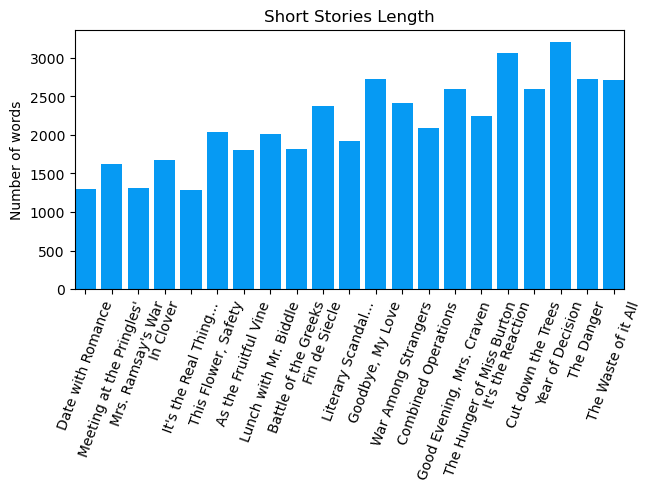

In [11]:
fig, ax = plt.subplots(constrained_layout=True)
ax.bar(titles_for_graphs, compound_table['number of words'], color='#069AF3')
plt.xticks(rotation=70)
ax.margins(x=0)
plt.ylabel('Number of words')
plt.title('Short Stories Length')
plt.show()

Initially these short stories were written for The New Yorker Magazine which presupposed the format limitation as literary journals demand from their contributors. This considers that size of the short stories expected to be homogenous. The earliest pieces written at the first year of war and almost do not exceed 2000 words. However from the 9th-11th pices (*Battle of the Greeks*, 8 March 1941; *Fin de Siecle*, 12 July 1941; *Literary Scandal at the Sewing Party*, 6 September 1941), all for 1941 M. Panter-Downes tends to be more colloquious and wordy. As the correlation table also demonstrates with the length of the short stories the number of sentences as well as the lexicon richness of the short story. However, Panter-Downes does not mechanically extracts her narrations with the number of paragraphs and their length in words, which demonstrates her rather unusual technique.

# Words, Sentences & Paragraphs

From the extracted metrics the only constinent stylometric parameter is average word length which varies extremely insignificantly (CV appr. 1%). In principle average word in *Good Evening, Mrs.Craven* is 5.5 characters which is slightly more than an average 5-charcter word in the Shakesperean corpus. The sentences which Panter-Downes composes for her fiction also are rather stable consisting of approximately 22.2 words. However, in a vicinity of of 10th-12th stories short stories cluster into two groups and some outliers. The pieces from *Mrs. Ramsay's War* up to *Battle of the Greek* are slightly sentecne longer that ones from *War Among Strangers*  to *The Waste of it All*. *Date with Romance*, *Meeting at the Pringles'* are minumum outliers in the first half of the stories colelction. *It's the Real Thing This Time* uses the longest sentecnes, however does not seem to be something extraordinary. From *Fin de Siecle*, in which Panter-Downes reaches the highest degree of her laconicity, excluding *Literary Scandal at the Sewing Party* in which she lengthens and sintactically sophisticates her and her characters phrases panter-Downes steadily recover the sentence length of 23-24 words. Second time, *Fin de Siecle* becomes a formal ridge for this collection of short stories.

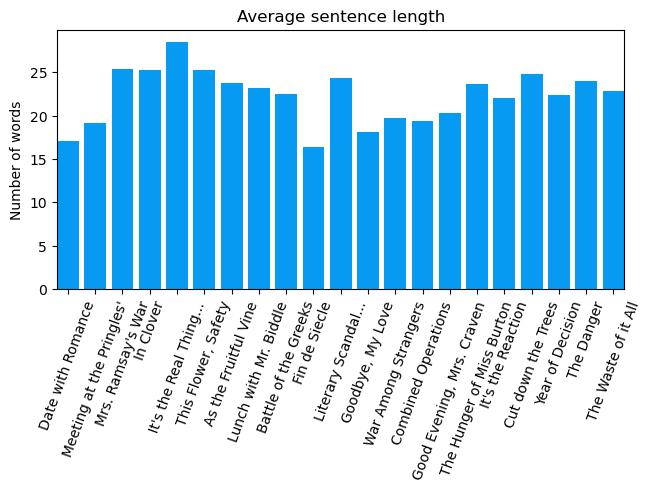

In [12]:
fig, ax = plt.subplots(constrained_layout=True)
ax.bar(titles_for_graphs, compound_table['average sentence length'], color='#069AF3')
plt.xticks(rotation=70)
ax.margins(x=0)
plt.ylabel('Number of words')
plt.title('Average sentence length')
plt.show()

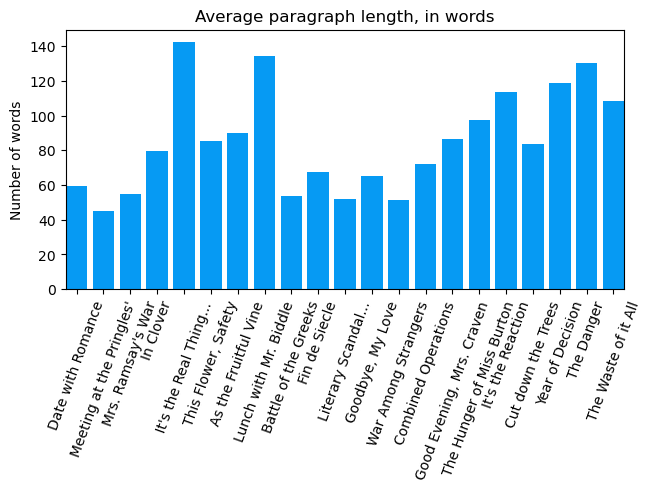

In [13]:
fig, ax = plt.subplots(constrained_layout=True)
ax.bar(titles_for_graphs, compound_table['average paragraph length in words'], color='#069AF3')
plt.xticks(rotation=70)
ax.margins(x=0)
plt.ylabel('Number of words')
plt.title('Average paragraph length, in words')
plt.show()

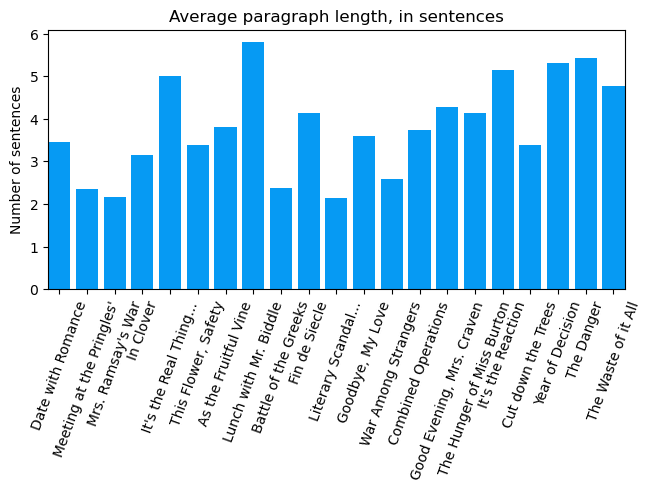

In [14]:
fig, ax = plt.subplots(constrained_layout=True)
ax.bar(titles_for_graphs, compound_table['average paragraph length in sentences'], color='#069AF3')
plt.xticks(rotation=70)
ax.margins(x=0)
plt.ylabel('Number of sentences')
plt.title('Average paragraph length, in sentences')
plt.show()

### Brief look at sentiment
Nevertheless, the length of Panter-Downes' sentences surprisingly correlates with negative sentiment score (cor = 0.56). Why when tonality towards war become more negative Panter-Downes' sentences lengthen? Whose sentences, of the author or her characters?\
In all short stories except for #13 *War among the Strangers* averall sentiment of the pieces is positive. And the fluctiations of negative sentiment (it is more picteresque if we look at negative-positive sentiment ratio), which is more important in defining the move of tonality for war literature, show that in the collection there are three flows of intensifying negative sentiment from 1 to 5, decline from 6 to 8, again growth from 9 to 13, abrupt fall and the initiation of the final wave of weak platauing sentiment intensification from 14 to 21, which suggests for criticism another approach to clustering short stories in the collection.


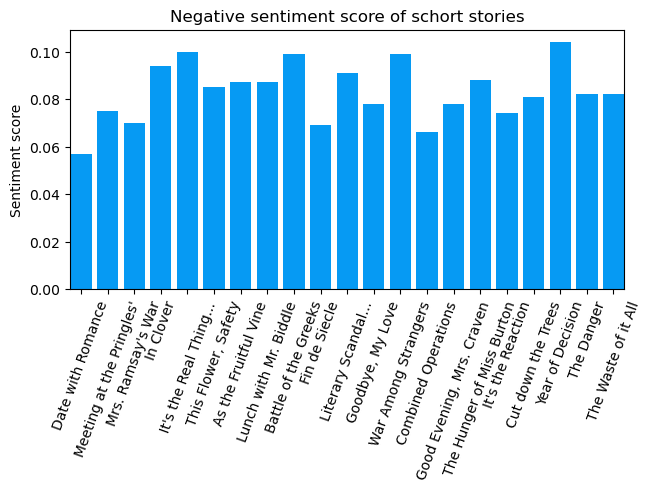

In [15]:
fig, ax = plt.subplots(constrained_layout=True)
ax.bar(titles_for_graphs, compound_table['sentiment negative'], color='#069AF3')
plt.xticks(rotation=70)
ax.margins(x=0)
plt.ylabel('Sentiment score')
plt.title('Negative sentiment score of schort stories')
plt.show()

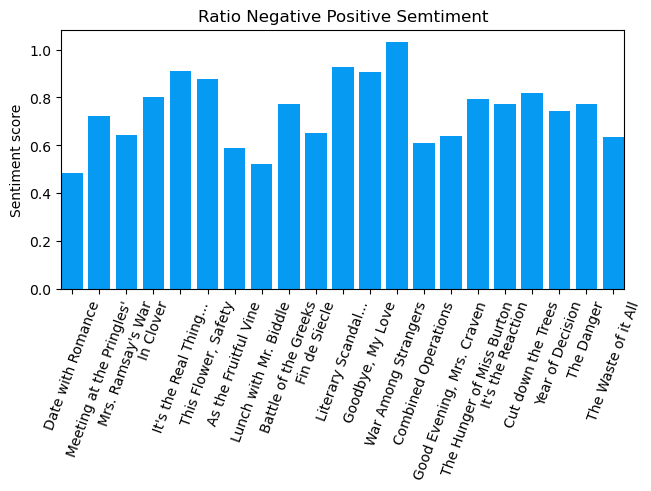

In [16]:
fig, ax = plt.subplots(constrained_layout=True);
ax.bar(titles_for_graphs, compound_table['sentiment negative'] / compound_table['sentiment positive'], color='#069AF3');
plt.xticks(rotation=70);
ax.margins(x=0);
plt.ylabel('Sentiment score');
plt.title('Ratio Negative Positive Semtiment');
plt.show();

In [17]:
neg_pos_sentiratio = compound_table['sentiment negative'] / compound_table['sentiment positive']
neg_pos_sentiratio.describe()

count    21.000000
mean      0.743937
std       0.141864
min       0.483051
25%       0.639344
50%       0.770833
75%       0.818182
max       1.031250
dtype: float64

### Semantic Domain of War

The key feature of ant war literature is the way how war is reflected, comprehended and imaged in texts of this genre. Semantic domain of war concept may characterize the way Panter-Downes represented the war, built its image on the pages of her short stories. Formally, semantic domain is a "is an area of meaning and the words used to talk about it. A domain is often given a name consisting of a common word in the domain. For instance English has a domain ‘Rain’, which includes words such as rain, drizzle, downpour, raindrop, puddle. We use these words to talk about the rain" [3]. So, semantic domains contains its core word and its associates. Thus, semantic domain of war presents as here:\
**"What words refer to war?**\
war, warfare, fighting, civil war, conflict, armed conflict,\
**What words refer to fighting a war?**\
fight a war, wage war, be at war, declare war, make war, go on the warpath, fight, clash,\
**What words refer to a time when armies fight?**\
war, battle, campaign, engagement, fight, contest, clash, skirmish\
**What words refer to the place where a war is fought?**\
battlefield, field of battle, theater of war, scene of the battle, front, front lines, flank, rear, war zone,\
**What words refer to strategy in war?**\
strategy, tactics, hunker down, keep up the pressure, overwhelm, concentrate your forces, form a line, hold the line, break the line, reform, rally, morale, maintain morale, military discipline, supply, supply lines, control the battle, battlefield control, reconnaissance, reconnoiter, intelligence, propaganda,\
**What words refer to an army moving?**\
deploy, maneuver, outmaneuver, flank, outflank, advance, charge, overrun, retreat, withdraw\
**What words refer to a person who fights on your side?**\
ally\
**What words refer to a person who wants to fight a war?**\
warmonger, militarist, hawk,\
**What words describe a person or country that wants to fight a war?**\
warlike,\
**What words describe countries that are at war?**\
warring\
**What words refer to someone who is hurt or killed in a war?**\
casualty, missing in action,"\
\
The compilations of these associated words was done via serveys of respondents who were asked which assosiations they have with war. And these assosiations may be used in our analysis as any reference to common truth while it heuristically does not make any distortions.\
The first way to solidly estimate the presense and intensity of war presense in text is to count war assosiates from the ready sematic domain.

In [18]:
search_results = []
results_for_table = []

for title in tqdm(ordered_titles):
    with open(f'Good Evening, Mrs. Craven texts/{title}', encoding='utf-8') as f:
        short_story = f.read()
        text = TextAnalyzer(short_story)
        lemmatized_text = text.text_lemmatization()
        results = war_semantic_field(lemmatized_text)
        search_results.append(results)
        summ_of_indents = [sum(line) for line in results[0]]
        results_for_table.append(sum(summ_of_indents))

new_compound_table = compound_table        
new_compound_table ['Semantic Domain (number of war related associates)'] = results_for_table

100%|██████████| 21/21 [00:03<00:00,  5.66it/s]


In [19]:
list_of_found_concordances = [line[1] for line in search_results]
list_of_found_concordances

[[['war', 'war'],
  ['front', 'front'],
  ['rally'],
  ['ally', 'ally', 'ally', 'ally', 'ally']],
 [['war', 'war', 'war', 'war', 'war', 'war'],
  ['front', 'front'],
  ['supply', 'supply', 'supply'],
  ['charge', 'charge'],
  ['ally', 'ally']],
 [['war', 'war', 'war', 'war', 'war', 'war', 'war'],
  ['battle'],
  ['charge'],
  ['retreat'],
  ['ally', 'ally', 'ally']],
 [['war', 'war', 'war', 'war', 'war', 'war'],
  ['charge'],
  ['ally', 'ally', 'ally', 'ally']],
 [['war', 'war', 'war', 'war', 'war', 'war', 'war', 'war', 'war', 'war'],
  ['fighting'],
  ['fight'],
  ['fight'],
  ['front'],
  ['flank'],
  ['flank'],
  ['ally', 'ally'],
  ['casualty']],
 [['war',
   'war',
   'war',
   'war',
   'war',
   'war',
   'war',
   'war',
   'war',
   'war',
   'war'],
  ['front', 'front'],
  ['charge'],
  ['ally', 'ally', 'ally']],
 [['war', 'war', 'war', 'war', 'war'],
  ['engagement'],
  ['front', 'front'],
  ['rally'],
  ['ally', 'ally', 'ally', 'ally', 'ally']],
 [['war', 'war', 'war', 'war

Vectors for PCA

In [20]:
vectors_for_pca = []
for i in range(len(search_results)):
    vector_for_one_text = []
    for number in search_results[i][0]:
        vector_for_one_text += list(number)
    vectors_for_pca.append(vector_for_one_text)

vectors_for_pca

    

[[2,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  2,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  5,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 [6,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  2,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  3,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  2,
  0,
  0,
  0,
  2,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 [7,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0

Here we reduced vectors which we use in pca analysis from 70 numbers into 22.

In [21]:
short_vectors_pca = [[] for i in range(21)]
for i in range(70):
    counter = 0
    for vector in vectors_for_pca:
        counter += vector[i]
    if counter > 0:
        for k in range(21):
            short_vectors_pca[k].append(vectors_for_pca[k][i])
short_vectors_pca

[[2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 5, 0],
 [6, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 3, 0, 0, 0, 2, 0, 0, 2, 0],
 [7, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 3, 0],
 [6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 4, 0],
 [10, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 1],
 [11, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 3, 0],
 [5, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 5, 0],
 [7, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0, 0, 13, 0],
 [6, 0, 0, 0, 0, 2, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 7, 0],
 [8, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0],
 [1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 8, 0],
 [7, 2, 0, 0, 0, 2, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
 [9, 0, 0, 0, 1, 2, 0, 0, 2, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 7, 0],
 [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0],
 [12, 1, 0, 0, 0, 1, 0, 0, 1, 2

In [22]:
from scipy import spatial

In [23]:
spatial.distance.euclidean(short_vectors_pca[0], short_vectors_pca[1])

6.244997998398398

In [24]:
spatial.distance.euclidean(short_vectors_pca[1], short_vectors_pca[2])

4.242640687119285

In [25]:
new_compound_table['Semantic Domain (number of war related associates)'].describe()

count    21.000000
mean     17.666667
std       6.605553
min       5.000000
25%      14.000000
50%      17.000000
75%      21.000000
max      36.000000
Name: Semantic Domain (number of war related associates), dtype: float64

In average, every short story comtains 17.7 items from the defined semantic domain of war. However, the stories demonstrated the significant variance in their formal volume parametres (length in words, sentences, paragraphs) which considers that absolute numbers do not adequately reflect the intensity of war-related semantic domain. Also, the most frequent common words (like articles, frequent pronouns, etc), which are in the heart of classic stylometry, do not carry speciffic significance in adding speciffic lexical meaning to the themes of the texts, i.e. to semantic domains. This distant reading analysis is insensible to minor connations (like how often the author avoids talking about war and its causalities, replacing such words with pronounce, i.e. making such lexis a kind of taboo). As the analysis considers such stop words as irrelevant, we count the percentage of war related semantic domain intensity by finding the ratio between the number of such entries of the domain and the number of unique words in text minus stop words.\
The percentage (intensity) of war semantic domain is following:

In [26]:
line_with_percentage_of_semantic_domain = new_compound_table['Semantic Domain (number of war related associates)'] / new_compound_table['number of unique words'] * 100
line_with_percentage_of_semantic_domain

title
1. Date with Romance                        2.061856
2. Meeting at the Pringles'                 2.890173
3. Mrs. Ramsay's War                        2.702703
4. In Clover                                1.950355
5. It's the Real Thing This Time            3.675048
6. This Flower, Safety                      2.377622
7. As the Fruitful Vine                     2.240000
8. Lunch with Mr. Biddle                    3.606103
9. Battle of the Greeks                     3.220339
10. Fin de Siecle                           2.109705
11. Literary Scandal at the Sewing Party    1.951952
12. Goodbye, My Love                        1.913265
13. War Among Strangers                     3.377386
14. Combined Operations                     0.762195
15. Good Evening, Mrs. Craven               2.586207
16. The Hunger of Miss Burton               3.002611
17. It's the Reaction                       2.607710
18. Cut down the Trees                      1.763224
19. Year of Decision                    

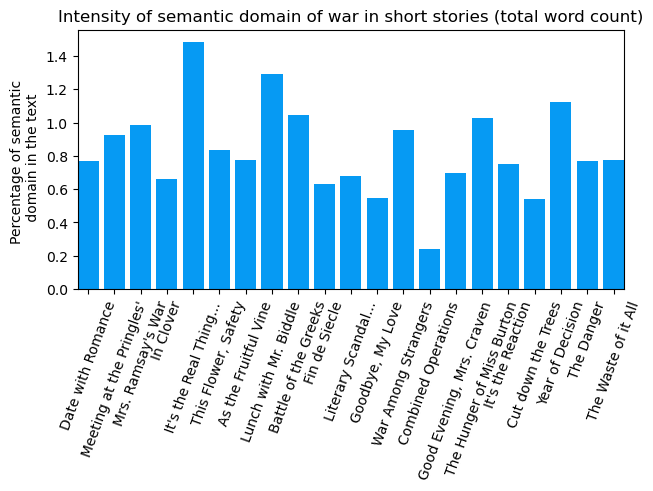

In [27]:
fig, ax = plt.subplots(constrained_layout=True)
ax.bar(titles_for_graphs, new_compound_table['Semantic Domain (number of war related associates)'] / new_compound_table['number of words'] * 100,
       color='#069AF3')
plt.xticks(rotation=70)
ax.margins(x=0)
plt.ylabel('Percentage of semantic \n domain in the text')
plt.title('Intensity of semantic domain of war in short stories (total word count)')
plt.show()



In [28]:
check_multicorr = pd.DataFrame()
check_multicorr['Total word count'] = new_compound_table['Semantic Domain (number of war related associates)'] / new_compound_table['number of words'] * 100
check_multicorr['Unique words'] = line_with_percentage_of_semantic_domain
check_multicorr.corr()

,Total word count,Unique words
Total word count,1.000000,0.920308
Unique words,0.920308,1.000000


In [29]:
line_with_percentage_of_semantic_domain.describe()

count    21.000000
mean      2.566847
std       0.755702
min       0.762195
25%       2.061856
50%       2.586207
75%       3.002611
max       3.973510
dtype: float64

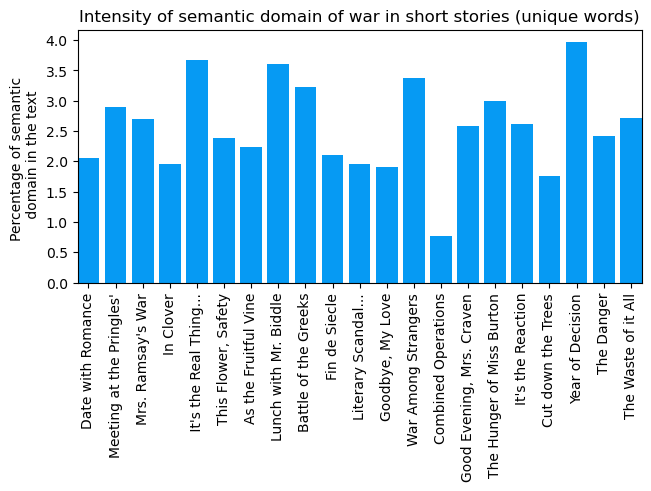

In [30]:
fig, ax = plt.subplots(constrained_layout=True);
ax.bar(titles_for_graphs, line_with_percentage_of_semantic_domain, color='#069AF3')
plt.xticks(rotation=90)
ax.margins(x=0)
plt.ylabel('Percentage of semantic \n domain in the text')
plt.title('Intensity of semantic domain of war in short stories (unique words)')
plt.show()

2.56% is the mean for all the collection of the short stories. However, the mode for the stories from *Date with Romance* to *War Among the Strangers* is around 2% with outliers exceeding 3%. The stories from *Good Evening, Mrs. Craven* to *The Waste of it All* in general tend to reach to 3% intensity of the semantic domain with some exceptions. Except for the new hint of division of this collection into two parts, the numbers demonstrate that there is the one story, *Year of Decision* which has almost 4%, twice more intencive than the line of the fist half of the collection (*It's the Real Thing This Time* and *Lunch with Mr. Biddle* are compatible with this one in intensity, too). Surprisingly, the story with the most intriguing war-related title *Combined Operations* has only 0.76% intensity of war semantic domain. 

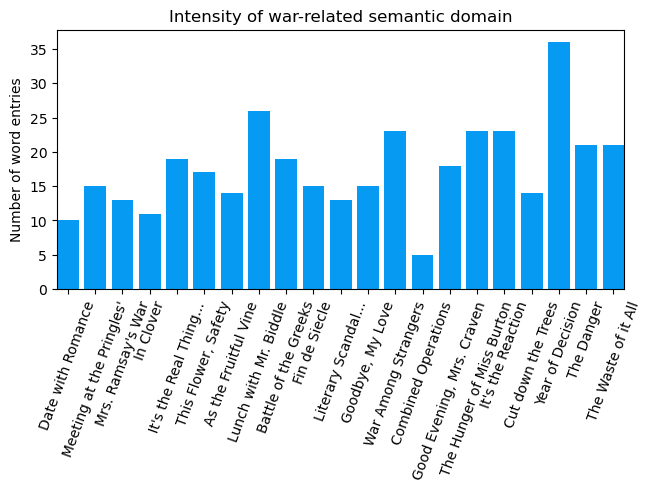

In [31]:
fig, ax = plt.subplots(constrained_layout=True);
ax.bar(titles_for_graphs, new_compound_table['Semantic Domain (number of war related associates)'], color='#069AF3')
plt.xticks(rotation=70)
ax.margins(x=0)
plt.ylabel('Number of word entries')
plt.title('Intensity of war-related semantic domain')
plt.show()

Further, we will look more precizely on the results of this analysis of semantic domain and look at the structure of semantic domain of every short story. However, there is another inductive way to identify war rellated topics. We use LDA topic modeling.

About LDA

Latent Dirichlet Allocation is a method of topic modeling. It is a statistical models which using text representation as a vectors is able to correspond words in the text with topics. This model is not generative and the number of topics is set within the analysis. The output is several lists of these connected with hidden topics words, while the interpretations rests for a researcher's mind. It is rather possible that among these algorithmically identified topics we could find some, related the to war theme.\
In the model, we set 5 topic to identify and each topic should have at least 10 words. The number of passes is the number of passes of algorithm through the dataset and affects only precision of identification of these thematic words. For the first attempt, we just tokenized and lemmatized texts without cleaning any stop words. Then texts of short stories were vectorized using doc2vec methods and were input into gensim LDA model. The results are below:

In [32]:
import gensim
from gensim import corpora
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/felix/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [33]:
texts = []
lemmatized_texts = []
for title in tqdm(ordered_titles):
    with open(f'Good Evening, Mrs. Craven texts/{title}', encoding='utf-8') as f:
        short_story = f.read()
    text = TextAnalyzer(short_story)
    lemmatized = text.text_lemmatization()
    lemmatized_texts.append(lemmatized)
    texts.append(lemmatized)

dictionary = corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

lda_model = gensim.models.LdaModel(corpus, num_topics=5, id2word=dictionary, passes=100)

topics = lda_model.print_topics(num_words=10)
for topic in topics:
    print(topic)

100%|██████████| 21/21 [00:03<00:00,  5.77it/s]


(0, '0.000*"the" + 0.000*"lettuce" + 0.000*"and" + 0.000*"droop" + 0.000*"france" + 0.000*"gerald" + 0.000*"beneath" + 0.000*"fit" + 0.000*"of" + 0.000*"nick"')
(1, '0.037*"mrs" + 0.027*"be" + 0.022*"the" + 0.017*"twistle" + 0.015*"peters" + 0.013*"a" + 0.013*"of" + 0.012*"I" + 0.011*"ramsay" + 0.010*"to"')
(2, '0.038*"the" + 0.027*"be" + 0.025*"and" + 0.022*"she" + 0.022*"a" + 0.020*"have" + 0.019*"to" + 0.018*"of" + 0.014*"he" + 0.012*"in"')
(3, '0.052*"the" + 0.028*"be" + 0.024*"a" + 0.023*"of" + 0.023*"and" + 0.022*"to" + 0.019*"in" + 0.018*"she" + 0.016*"have" + 0.014*"he"')
(4, '0.052*"the" + 0.033*"be" + 0.028*"and" + 0.026*"to" + 0.023*"a" + 0.022*"she" + 0.021*"of" + 0.018*"have" + 0.016*"in" + 0.013*"it"')


In [34]:
nltk.download('stopwords')
from nltk.corpus import stopwords
english_stopwords = stopwords.words('english')

[nltk_data] Downloading package stopwords to /home/felix/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


The results are unsatisfactory as all the topics, identified by LDA are official words like conjuctions, articles and prepositions. During the second iteration we delete from the short stories these official words and stop words.

In [35]:
texts = []
#extra = ['the', 'and', 'for', 'a', 'of', 'to', 'in', 'she', 'her', 'was', 'had', 'he', 'that', 'him', 'his', 's', 'it',
        #'i', 'with', 'at', 'you', 'as', 'on', 'on', 'they', 'them', 't', 'said', 'be', 'don', 'up', 'miss', 'but', ' from',
        #'were', 'would', 'out']
extra = ['the', 'and', 'for', 'a', 'of', 'to', 'in', 'be', 'I', 'that', 'it', 'have', 'she', 'her', 'he', 'say', 'mr', 'mrs', 'with',
'not', 'they', 'on', 'you', 'would', 'do', 'at', 'up', 'as', 's', 'will', 'out', 'his', 'but', '’s', 'from', 'miss', 'there', 'who',
'or', 'over', 'adrian', 'ruth', 'we', 'don', 'parmenter', 'walsingham', 'dossie', 'if', 'clark', 'margaret', 'by', 'vereker',
'twistle', 'their', 'peters', 'gerald', 'ramsay', 'fletcher', 'biddle', 'about', 'an', 'bristowe', 'down', 'dudley', 'jessie', 'lucy',
'janet', 'burton', 'ernestine', 'walter', 'marriot', 'could', 'which', 'like', 'trent', 'when', 'all', 'get', 'think', 'ewing', 'into',
'know', 'look', 'go', 'valerie', 'philip', 'only', 'after', 'off', 'so', 'rudd', 'come', 'now', 'one', 'what', 'feel', 'make',
'mark', 'my', 'this', 'craig', 'traver', 'some', 'more', 'jay', 'masters', 'take', 'raymond', 'though', 'back', 'roger', 'dora', 
'craven', 'gregory', 'dean', 'laura', 'merrill', "\'s", 'vyner', 'crumpington', 'pringle', "sysonby", "hunter", 'taylor', 'seem',
'spark', 'ewe', 'dear' ]
for item in lemmatized_texts:
    texts.append([word for word in item if not word in extra and not word in english_stopwords])

#texts = [[word for word in word_tokenize(document.lower()) if word.isalnum()] for document in documents]

dictionary = corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

# Обучение модели LDA
lda_model = gensim.models.LdaModel(corpus, num_topics=5, id2word=dictionary, passes=30)

# Вывод топ-5 слов для каждой темы
topics = lda_model.print_topics(num_words=5)
for topic in topics:
    print(topic)



(0, '0.006*"old" + 0.006*"house" + 0.006*"war" + 0.006*"day" + 0.005*"little"')
(1, '0.005*"well" + 0.004*"time" + 0.004*"sit" + 0.004*"child" + 0.004*"see"')
(2, '0.007*"little" + 0.006*"birch" + 0.006*"room" + 0.006*"evening" + 0.005*"good"')
(3, '0.014*"france" + 0.006*"time" + 0.005*"baby" + 0.005*"little" + 0.004*"home"')
(4, '0.005*"house" + 0.004*"good" + 0.004*"young" + 0.004*"give" + 0.004*"room"')


In [36]:
lda_model = gensim.models.LdaModel(corpus, num_topics=10, id2word=dictionary, passes=30)

# Вывод топ-5 слов для каждой темы
topics = lda_model.print_topics(num_words=5)
for topic in topics:
    print(topic)

(0, '0.019*"france" + 0.008*"old" + 0.007*"kitchen" + 0.006*"home" + 0.006*"little"')
(1, '0.008*"house" + 0.006*"room" + 0.005*"really" + 0.004*"leave" + 0.004*"moment"')
(2, '0.014*"major" + 0.006*"see" + 0.006*"war" + 0.006*"real" + 0.005*"day"')
(3, '0.017*"carver" + 0.017*"room" + 0.013*"peake" + 0.009*"lady" + 0.008*"village"')
(4, '0.000*"little" + 0.000*"time" + 0.000*"good" + 0.000*"room" + 0.000*"old"')
(5, '0.007*"madeline" + 0.006*"mad" + 0.005*"bed" + 0.004*"time" + 0.004*"day"')
(6, '0.006*"well" + 0.006*"little" + 0.005*"good" + 0.005*"time" + 0.005*"old"')
(7, '0.006*"day" + 0.006*"birch" + 0.006*"little" + 0.005*"time" + 0.005*"old"')
(8, '0.000*"little" + 0.000*"day" + 0.000*"time" + 0.000*"house" + 0.000*"room"')
(9, '0.010*"little" + 0.006*"ask" + 0.006*"yum" + 0.005*"home" + 0.004*"room"')


In [37]:
lda_model = gensim.models.LdaModel(corpus, num_topics=15, id2word=dictionary, passes=30)

# Вывод топ-5 слов для каждой темы
topics = lda_model.print_topics(num_words=5)
for topic in topics:
    print(topic)

(0, '0.000*"good" + 0.000*"day" + 0.000*"little" + 0.000*"old" + 0.000*"house"')
(1, '0.007*"old" + 0.006*"well" + 0.006*"time" + 0.005*"good" + 0.005*"day"')
(2, '0.000*"day" + 0.000*"thing" + 0.000*"little" + 0.000*"war" + 0.000*"major"')
(3, '0.000*"little" + 0.000*"house" + 0.000*"hear" + 0.000*"war" + 0.000*"evening"')
(4, '0.007*"little" + 0.007*"day" + 0.006*"see" + 0.006*"war" + 0.005*"room"')
(5, '0.007*"house" + 0.005*"really" + 0.005*"room" + 0.005*"good" + 0.005*"give"')
(6, '0.008*"place" + 0.007*"ow" + 0.007*"gentleman" + 0.006*"party" + 0.006*"lady"')
(7, '0.016*"greek" + 0.010*"ow" + 0.008*"well" + 0.008*"daddy" + 0.007*"pyjama"')
(8, '0.000*"good" + 0.000*"room" + 0.000*"well" + 0.000*"day" + 0.000*"child"')
(9, '0.018*"room" + 0.017*"carver" + 0.013*"peake" + 0.009*"lady" + 0.008*"village"')
(10, '0.008*"time" + 0.008*"little" + 0.007*"old" + 0.007*"good" + 0.007*"evening"')
(11, '0.028*"france" + 0.008*"little" + 0.006*"baby" + 0.006*"letter" + 0.006*"home"')
(12, '0

In [38]:
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis

In [39]:
vis = gensimvis.prepare(lda_model, corpus, dictionary)
pyLDAvis.enable_notebook()
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.081897  0.017210       1        1  27.338326
4      0.101022  0.030761       2        1  19.728550
5      0.081019 -0.011450       3        1  10.928706
10     0.138939  0.034197       4        1   9.768187
14     0.094449 -0.099100       5        1   9.508478
11     0.079022  0.003505       6        1   5.959023
13     0.045753 -0.062236       7        1   5.120998
6     -0.055873  0.135463       8        1   4.153648
7     -0.037467  0.132094       9        1   3.934303
9     -0.033120 -0.026959      10        1   3.522364
0     -0.099143 -0.030706      11        1   0.007483
2     -0.099150 -0.030703      12        1   0.007483
3     -0.099178 -0.030716      13        1   0.007483
8     -0.099142 -0.030698      14        1   0.007483
12    -0.099028 -0.030663      15        1   0.007483, topic_info=         Term       Freq      Total Category  logprob  loglift
1332   france  36.000000  36.000000  Default  30.0000  30.0000
3872    birch  32.000000  32.000000  Default  29.0000  29.0000
282      room  87.000000  87.000000  Default  28.0000  28.0000
180      lady  30.000000  30.000000  Default  27.0000  27.0000
368       war  69.000000  69.000000  Default  26.0000  26.0000
...       ...        ...        ...      ...      ...      ...
368       war   0.000292  69.922831  Topic15  -8.4734  -2.8850
485   evening   0.000292  51.560420  Topic15  -8.4735  -2.5804
427      call   0.000292  34.653150  Topic15  -8.4735  -2.1830
287       see   0.000292  68.654032  Topic15  -8.4739  -2.8671
699       two   0.000292  39.445599  Topic15  -8.4739  -2.3129

[1103 rows x 6 columns], token_table=      Topic      Freq Term
term                      
0         1  0.295899  've
0         2  0.147950  've
0         3  0.258912  've
0         4  0.110962  've
0         6  0.073975  've
...     ...       ...  ...
728       3  0.184874   ’m
728       4  0.215686   ’m
728       8  0.061625   ’m
728       9  0.030812   ’m
728      10  0.030812   ’m

[1896 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 5, 6, 11, 15, 12, 14, 7, 8, 10, 1, 3, 4, 9, 13])

The resulted topics are not so meaningful and overlapping each other even if LDA was set to generate a few of them. Moreover, ot took to clean the text not only from stop words, some frequent but less meaningful verbs (get, see, say, take, etc.) and titles (Mrs., Ms., Mr.) but also from the names of characters as they appeared in produced topics, although most of the short stories have unique (at least by names if not types) characters. Even not dwelving into LDA mechanism, the style of Panter-Downes. Significant amount of her texts consists of official words, named entities, non-active verbs and other lexis which has a limited effect into conceptualization of texts, creating the skeleton of images. In the graphs below the correspondence of total length of the texts (only tokenized), lemmatized text with excluded extra words (used for LDA topic modeling) and number of unique words excluding extra words. As a model, LDA considers frequences and position of words. So, in the texts with a lower ratio of unique words when some formally non-stopword but distracting from ease of our topic modeling (like character's name which occurs only in one text or frequent title as Mrs.) appears it immeadeately penetrates the topic.

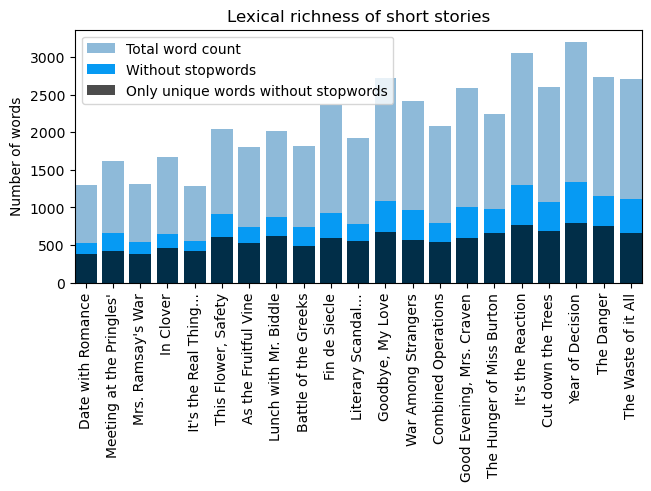

In [59]:
lengthes = [len(text) for text in texts]
unique_words_without_stops = [len(set(text)) for text in texts]
plt.figure(constrained_layout=True)
plt.bar(titles_for_graphs, compound_table['number of words'], alpha=0.5, label = 'Total word count')
plt.bar(titles_for_graphs, lengthes, label = 'Without stopwords', color='#069AF3')
plt.bar(titles_for_graphs, unique_words_without_stops, alpha=0.7, color='black', label='Only unique words without stopwords')
plt.xticks(rotation=90)
plt.ylabel('Number of words')
plt.title('Lexical richness of short stories')
plt.margins(x=0)
plt.legend()
plt.show()

Anyway, the produced topic are not useless. War appears in the first set of LDA parametres when the number of topics was tuned as 5.\
\
0.009*"france" + 0.006*"good" + 0.006*"little" + 0.005*"war" + 0.005*"day"'\
\
As there is France we even can say which short stories initiated this topic, but important that the concomitant context is rather peaceful and is connected with calm everyday life which demonstrate another variant of LDA topic modeling with 10 and 15 themes. Rather evidently, many themes are connected with home, rooms, walls, old buildings. What's more interesting, in a set of 15 themes almost every home topic is related with war ("room, old, house, see, war", "room, old, lady, good, peake", etc). Because of the problems for LDA analysis these topics are vague and correspond to majority of assocoations with text, however they demonstrate importance of so-called "home front" motive, which is considered as a major part of women's military fiction (see Higginet and other). Thus, war is associated with home motifs but topic modeling was unable to give any hints to another components of war semantic domain.

In [41]:
sh_st_direct_speech = [] # compile in ome list all direct speech as strings
for title in range(1,22):
    with open(f'direct speech/{title}.txt') as f:
        text = f.read()
    sh_st_direct_speech.append(text)

In [42]:
direct_speech_w_length = [] # write in list the length of direct speech
for story in sh_st_direct_speech:
    text = TextAnalyzer(story)
    direct_speech_w_length.append(text.text_number_of_words())
table_with_d_speech = new_compound_table
table_with_d_speech['Length of direct speech'] = direct_speech_w_length
table_with_d_speech['Percentage of direct speech'] = table_with_d_speech['Length of direct speech'] / table_with_d_speech['number of words'] * 100

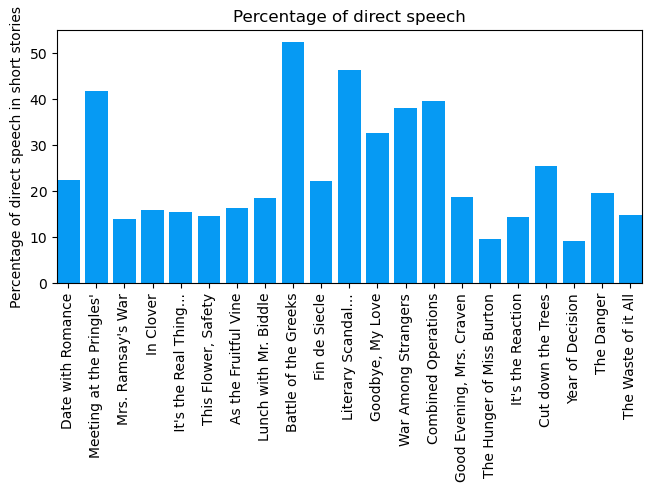

In [43]:
fig, ax = plt.subplots(constrained_layout=True);
ax.bar(titles_for_graphs, table_with_d_speech['Percentage of direct speech'], color='#069AF3')
plt.xticks(rotation=90)
ax.margins(x=0)
plt.ylabel('Percentage of direct speech in short stories')
plt.title('Percentage of direct speech')
plt.show()

In [44]:
direct_speech_neg_sentiment = []
for story in sh_st_direct_speech:
    text = TextAnalyzer(story)
    sentiment = text.text_total_sentiment()
    direct_speech_neg_sentiment.append(sentiment['neg'])
table_with_d_speech['Negative sentiment of direct speech'] = direct_speech_neg_sentiment

In [45]:
table_with_d_speech

,number of words,number of sentences,number of unique words,number of paragraphs,average word length,average sentence length,average paragraph length in sentences,average paragraph length in words,sentiment negative,sentiment neutral,sentiment positive,sentiment compound,Semantic Domain (number of war related associates),Length of direct speech,Percentage of direct speech,Negative sentiment of direct speech
title,,,,,,,,,,,,,,,,
1. Date with Romance,1301,76,485,22,5.515757,17.118421,3.454545,59.136364,0.057,0.825,0.118,0.9978,10,291,22.367410,0.029
2. Meeting at the Pringles',1624,85,519,36,5.487685,19.105882,2.361111,45.111111,0.075,0.821,0.104,0.9956,15,679,41.810345,0.056
3. Mrs. Ramsay's War,1317,52,481,24,5.599089,25.326923,2.166667,54.875000,0.070,0.822,0.109,0.9937,13,183,13.895216,0.108
4. In Clover,1669,66,564,21,5.517076,25.287879,3.142857,79.476190,0.094,0.789,0.117,0.9939,11,265,15.877771,0.044
5. It's the Real Thing This Time,1281,45,517,9,5.442623,28.466667,5.000000,142.333333,0.100,0.790,0.110,0.9534,19,198,15.456674,0.146
"6. This Flower, Safety",2043,81,715,24,5.641214,25.222222,3.375000,85.125000,0.085,0.818,0.097,0.9865,17,297,14.537445,0.037
7. As the Fruitful Vine,1802,76,625,20,5.502775,23.710526,3.800000,90.100000,0.087,0.765,0.148,0.9988,14,291,16.148724,0.068
8. Lunch with Mr. Biddle,2015,87,721,15,5.711166,23.160920,5.800000,134.333333,0.087,0.747,0.166,0.9996,26,370,18.362283,0.071
9. Battle of the Greeks,1817,81,590,34,5.588332,22.432099,2.382353,53.441176,0.099,0.772,0.128,0.9957,19,954,52.504128,0.114


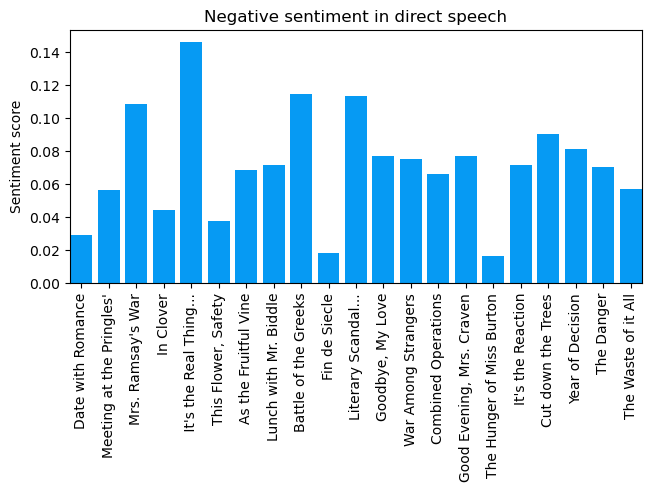

In [46]:
fig, ax = plt.subplots(constrained_layout=True);
ax.bar(titles_for_graphs, compound_table['Negative sentiment of direct speech'], color='#069AF3')
plt.xticks(rotation=90)
ax.margins(x=0)
plt.ylabel('Sentiment score')
plt.title('Negative sentiment in direct speech')
plt.show()

In [47]:
table_with_d_speech.describe()

,number of words,number of sentences,number of unique words,number of paragraphs,average word length,average sentence length,average paragraph length in sentences,average paragraph length in words,sentiment negative,sentiment neutral,sentiment positive,sentiment compound,Semantic Domain (number of war related associates),Length of direct speech,Percentage of direct speech,Negative sentiment of direct speech
count,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000
mean,2167.857143,99.857143,685.761905,27.571429,5.495800,22.257823,3.813946,85.236574,0.083143,0.802905,0.114000,0.977352,17.666667,504.047619,23.836526,0.070667
std,567.212419,30.926179,127.667108,8.925085,0.106855,3.100920,1.127621,29.758752,0.012285,0.025513,0.019445,0.050705,6.605553,263.012638,12.734730,0.032475
min,1281.000000,45.000000,481.000000,9.000000,5.292824,16.337931,2.135135,45.111111,0.057000,0.747000,0.086000,0.810000,5.000000,183.000000,9.017161,0.016000
25%,1802.000000,79.000000,590.000000,22.000000,5.440556,19.770492,3.142857,59.136364,0.075000,0.789000,0.099000,0.993700,14.000000,291.000000,14.675516,0.056000
50%,2086.000000,95.000000,696.000000,27.000000,5.487685,22.789916,3.724138,83.806452,0.082000,0.811000,0.109000,0.997500,17.000000,438.000000,18.557099,0.071000
75%,2598.000000,122.000000,775.000000,34.000000,5.565727,24.341772,4.760000,108.480000,0.091000,0.822000,0.122000,0.998700,21.000000,679.000000,32.551320,0.081000
max,3205.000000,151.000000,906.000000,47.000000,5.711166,28.466667,5.800000,142.333333,0.104000,0.837000,0.166000,0.999600,36.000000,954.000000,52.504128,0.146000


In [48]:
table_with_d_speech.corr()

,number of words,number of sentences,number of unique words,number of paragraphs,average word length,average sentence length,average paragraph length in sentences,average paragraph length in words,sentiment negative,sentiment neutral,sentiment positive,sentiment compound,Semantic Domain (number of war related associates),Length of direct speech,Percentage of direct speech,Negative sentiment of direct speech
number of words,1.000000,0.895057,0.947972,0.333573,-0.384669,-0.212699,0.491747,0.322247,0.123568,0.015703,-0.094571,0.038917,0.557243,0.210839,-0.184527,-0.154919
number of sentences,0.895057,1.000000,0.770407,0.533608,-0.602872,-0.599405,0.363928,0.064065,-0.121543,0.195988,-0.180094,0.014392,0.366401,0.351311,-0.015440,-0.302440
number of unique words,0.947972,0.770407,1.000000,0.146118,-0.143753,-0.035652,0.592531,0.478705,0.177908,-0.051663,-0.039175,0.077530,0.594699,0.099128,-0.276042,-0.167796
number of paragraphs,0.333573,0.533608,0.146118,1.000000,-0.444134,-0.592985,-0.552829,-0.720441,-0.046838,0.410437,-0.511679,-0.515003,-0.090747,0.806451,0.657568,-0.050372
average word length,-0.384669,-0.602872,-0.143753,-0.444134,1.000000,0.516415,-0.058268,0.138905,0.118718,-0.295611,0.315116,0.100819,0.043368,-0.243024,-0.036266,0.043005
average sentence length,-0.212699,-0.599405,-0.035652,-0.592985,0.516415,1.000000,0.104033,0.482287,0.553638,-0.367167,0.139124,-0.013295,0.169757,-0.423189,-0.344527,0.495286
average paragraph length in sentences,0.491747,0.363928,0.592531,-0.552829,-0.058268,0.104033,1.000000,0.917340,0.076138,-0.352125,0.416130,0.402855,0.562327,-0.431620,-0.621678,-0.109362
average paragraph length in words,0.322247,0.064065,0.478705,-0.720441,0.138905,0.482287,0.917340,1.000000,0.302770,-0.455767,0.411214,0.327111,0.563878,-0.530922,-0.656046,0.116293
sentiment negative,0.123568,-0.121543,0.177908,-0.046838,0.118718,0.553638,0.076138,0.302770,1.000000,-0.666771,0.241539,-0.379771,0.582863,0.037322,0.012794,0.425725
sentiment neutral,0.015703,0.195988,-0.051663,0.410437,-0.295611,-0.367167,-0.352125,-0.455767,-0.666771,1.000000,-0.883919,-0.096571,-0.551156,0.266143,0.197722,-0.206130


### Another Approach: Contextualized Embeddings
Here we use contextualized embeddings to identify words similar to war.

In [49]:
#from simple_elmo import ElmoModel

### PCA
Here we conduct PCA analysis

In [50]:
from sklearn.decomposition import PCA

In [51]:
pca_semdom = PCA()
pca_components = pca_semdom.fit_transform(short_vectors_pca)
pca_components

array([[-5.79287859e+00, -3.97927763e-01, -6.36481619e-01,
        -1.02454817e+00, -7.23328392e-01, -1.87426348e-01,
        -2.68461070e-02,  4.19887722e-01, -1.63529177e-01,
         7.49081860e-02, -9.12016125e-02,  2.65454552e-01,
        -1.15174473e-01,  9.09892455e-03,  4.65188529e-03,
         1.08110500e-01, -1.92296414e-01, -6.90812969e-02,
         1.29776139e-16, -1.87260476e-17, -1.89238342e-18],
       [-2.06867217e+00, -3.86107240e+00, -2.17451056e+00,
        -9.86078244e-01,  2.06561371e+00,  1.25396170e+00,
         2.62914436e-01, -3.16866908e-01,  1.73810642e-01,
         1.02914107e-01, -2.11878949e-01, -2.55090119e-02,
         2.73948398e-02,  5.48427837e-03,  6.20734428e-02,
        -1.88844673e-02, -2.20752774e-02,  1.44093341e-04,
         3.14171878e-17, -3.22503806e-18,  7.47969837e-18],
       [-1.09276330e+00, -2.81462871e+00, -2.80297764e-01,
         1.49150758e+00,  4.34231700e-01,  1.81172469e-01,
        -4.65962078e-01,  4.59318067e-01, -3.70168785e

In [52]:
print(pca_semdom.explained_variance_ratio_)

[4.59829653e-01 4.25979077e-01 3.57030236e-02 2.55003081e-02
 1.65787667e-02 1.19527447e-02 5.66544205e-03 4.81658046e-03
 3.23570055e-03 2.83705924e-03 2.05404643e-03 1.85962184e-03
 1.72195167e-03 7.26307670e-04 6.72607770e-04 4.87649943e-04
 3.55028017e-04 2.44319370e-05 1.18496348e-34 8.87580136e-35
 1.38586932e-36]


In [53]:
print(pca_semdom.singular_values_)

[1.83118896e+01 1.76249871e+01 5.10254886e+00 4.31228433e+00
 3.47704879e+00 2.95235444e+00 2.03259838e+00 1.87414886e+00
 1.53609769e+00 1.43836424e+00 1.22388272e+00 1.16452011e+00
 1.12058590e+00 7.27771408e-01 7.00350775e-01 5.96332890e-01
 5.08822125e-01 1.33479209e-01 2.93959268e-16 2.54412509e-16
 3.17903869e-17]


In [54]:
#plt.figure()
#plt.scatter(pca_components[:,0], pca_components[:,1])
#plt.show()

Text(0.5, 1.0, 'PC1 and PC2 visualization')

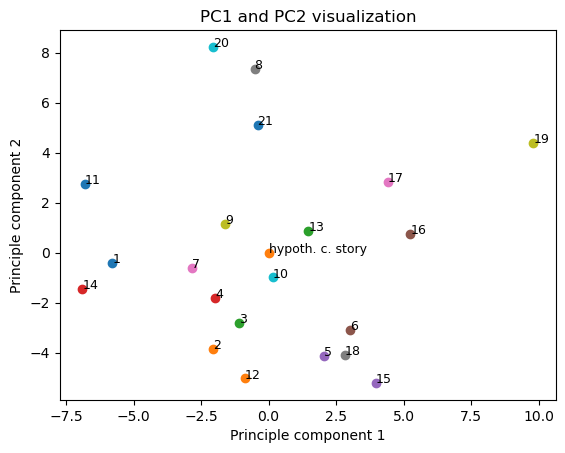

In [55]:
plt.figure()
selected_vectors = short_vectors_pca
labels = [i for i in range(1,22)]
all_x = 0
all_y = 0

for vector_index in range(len(selected_vectors)):
  plt.scatter(pca_components[vector_index][0], pca_components[vector_index][1])
  all_x += pca_components[vector_index][0]
  all_y += pca_components[vector_index][1]
  plt.text(pca_components[vector_index][0], pca_components[vector_index][1], labels[vector_index], fontsize=9)

plt.scatter(all_x / len(selected_vectors), all_y / len(selected_vectors))
plt.text(all_x / len(selected_vectors), all_y / len(selected_vectors),'hypoth. c. story',fontsize=9)
plt.xlabel('Principle component 1')
plt.ylabel('Principle component 2')
plt.title('PC1 and PC2 visualization')

Text(0.5, 1.0, 'PC2 and PC3 visualization')

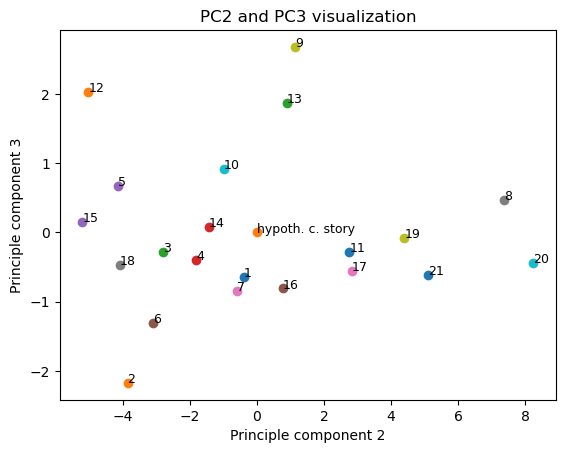

In [56]:
all_x = 0
all_y = 0

plt.figure()
for vector_index in range(len(selected_vectors)):
  plt.scatter(pca_components[vector_index][1], pca_components[vector_index][2])
  all_x += pca_components[vector_index][1]
  all_y += pca_components[vector_index][2]
  plt.text(pca_components[vector_index][1], pca_components[vector_index][2], labels[vector_index], fontsize=9)

plt.scatter(all_x / len(selected_vectors), all_y / len(selected_vectors))
plt.text(all_x / len(selected_vectors), all_y / len(selected_vectors),'hypoth. c. story',fontsize=9)
plt.xlabel('Principle component 2')
plt.ylabel('Principle component 3')
plt.title('PC2 and PC3 visualization')

### Characters


In [57]:
lines = []
main_characters = []
secondary_characters = []
number_of_characters = []
female_characters = []
male_characters = []
female_main = []
male_main = []
female_secondary = []
male_secondary = []
children_characters = []
MF_characters = []
characters = []

with open (f"C:/Users/artem/Documents/my python projects/Mollie Panter-Downes/characters' names.txt") as f:
    lines = f.read()
lines = lines.split('\n')
for line in lines:
    female_characters.append(line.count("(F)"))
    male_characters.append(line.count("(M)"))
    children_characters.append(line.count('(CH)'))
    MF_characters.append(line.count('(MF)'))
    subline = line.split(': ')
    characters.append(subline[1])
    line_characters = subline[1].split('; ')
    line_main_characters = line_characters[0]
    line_sec_characters = line_characters[1]
    female_main.append(line_main_characters.count("(F)"))
    male_main.append(line_main_characters.count('(M)'))
    main_characters.append(line_main_characters.split(', '))
    secondary_characters.append(line_sec_characters.split(', '))
    female_secondary.append(line_sec_characters.count('(F)'))
    male_secondary.append(line_sec_characters.count('(M)'))

FileNotFoundError: [Errno 2] No such file or directory: "C:/Users/artem/Documents/my python projects/Mollie Panter-Downes/characters' names.txt"

In [ ]:
main_characters

[['(F) Helen Ramsay', '(M) Mr. Gerald Spalding'],
 ['(F) Ms. Lois Pringle',
  '(F) Ms. Alice Pringle',
  '(F) Mrs. Taylor',
  '(F) Mrs. Peake',
  '(F) Ms. Lois Craddock',
  '(F) Mrs. Doris Carver'],
 ['(F) Mrs. Ramsay', '(F) Mrs. Susan Ramsay', ' (F) Mrs. Parmenter'],
 ['(F) Miss Vereker',
  '(F) Mrs. Clark',
  '(F) Mrs. Fletcher',
  '(F) Mrs. Clark',
  '(M) Captain Fletcher',
  '(M) Mr. Clark'],
 ['(M) Major Gerald Marriot', '(F) Miss Marriot', '(F) Mrs. Trent'],
 ['(F) Miss Mildred Ewing',
  '(F) Sparks',
  '(F) Mrs. Prentiss',
  '(F) Miss Challoner',
  "(M) Miss Ewing's nephew"],
 ['(F) Lucy Grant',
  '(M) Philip Grant',
  "(F) Lucy's mother",
  '(F) Valerie',
  '(M) Bernard',
  '(F) Monica',
  '(M) The bus conductor'],
 ['(M) Winthrop Biddle',
  '(F) Mme. Delacroix',
  '(F) Mrs. Maverick',
  '(F) Effie Trumpington',
  '(F) Dora Cunningham',
  '(M) General Sysonby',
  '(F) Ursula Farmer',
  '(F) Mrs. Sysonby',
  '(M) Mr. Potts',
  '(M) Carter',
  '(M) Gardener'],
 ['(F) Mrs. Ramsay'

In [ ]:
main_characters

characters_table = pd.DataFrame()
characters_table['titles'] = ordered_titles
characters_table['number of main characters'] = [len(item) for item in main_characters]
characters_table['among them women'] = female_main
characters_table['number of mentioned characters'] = [len(item) for item in secondary_characters]
characters_table['...among them women'] = female_secondary
characters_table['...among them men'] = male_secondary
characters_table['all characters'] = characters_table['number of main characters'] + characters_table['number of mentioned characters']
characters_table['number of female characters'] = female_characters
characters_table['number of male characters'] = male_characters
characters_table

,titles,number of main characters,among them women,number of mentioned characters,...among them women,...among them men,all characters,number of female characters,number of male characters
0,1. Date with Romance.txt,2,1,4,3,1,6,4,2
1,2. Meeting at the Pringles'.txt,6,6,5,3,1,11,9,1
2,3. Mrs. Ramsay's War.txt,3,3,6,2,4,9,5,4
3,4. In Clover.txt,6,4,4,1,2,10,5,4
4,5. It's the Real Thing This Time.txt,3,2,1,1,0,4,3,1
5,"6. This Flower, Safety.txt",5,4,2,1,1,7,5,2
6,7. As the Fruitful Vine.txt,7,4,4,1,2,11,5,5
7,8. Lunch with Mr. Biddle.txt,11,6,6,3,1,17,9,6
8,9. Battle of the Greeks.txt,8,7,3,0,3,11,7,4
9,10. Fin de Siecle.txt,4,1,11,3,7,15,4,10


In [ ]:
characters_table['number of main characters'].sum()

107

In [ ]:
characters_table['number of mentioned characters'].sum()

90

In [ ]:
characters_table.describe()

,number of main characters,among them women,number of mentioned characters,...among them women,...among them men,all characters,number of female characters,number of male characters
count,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000
mean,5.095238,3.428571,4.285714,1.428571,1.952381,9.380952,4.857143,3.380952
std,2.165751,1.938335,2.512824,1.028175,1.935877,3.528118,2.056349,2.268836
min,2.000000,1.000000,1.000000,0.000000,0.000000,4.000000,2.000000,1.000000
25%,4.000000,2.000000,3.000000,1.000000,1.000000,6.000000,3.000000,2.000000
50%,5.000000,3.000000,4.000000,1.000000,1.000000,10.000000,5.000000,2.000000
75%,6.000000,4.000000,5.000000,2.000000,3.000000,11.000000,5.000000,4.000000
max,11.000000,8.000000,11.000000,3.000000,7.000000,17.000000,9.000000,10.000000


c:\Users\artem\anaconda3\envs\textanalysis\Lib\site-packages\ipywidgets\widgets\widget.py:503: DeprecationWarning: Passing unrecognized arguments to super(Toolbar).__init__().
NavigationToolbar2WebAgg.__init__() missing 1 required positional argument: 'canvas'
This is deprecated in traitlets 4.2.This error will be raised in a future release of traitlets.
  super().__init__(**kwargs)


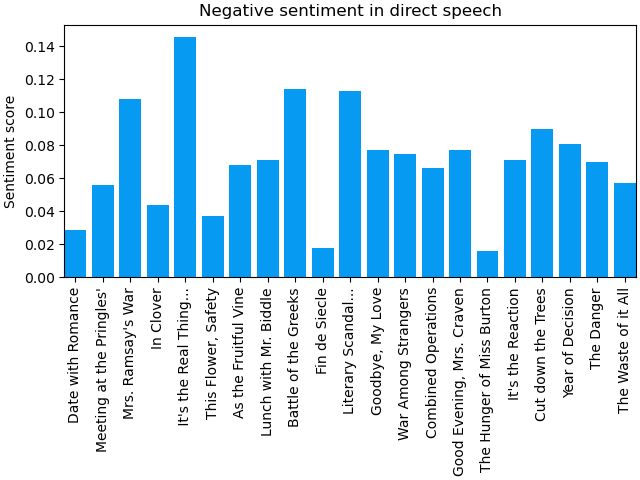

In [ ]:
fig, ax = plt.subplots(constrained_layout=True);
ax.bar(titles_for_graphs, compound_table['Negative sentiment of direct speech'], color='#069AF3')
plt.xticks(rotation=90)
ax.margins(x=0)
plt.ylabel('Sentiment score')
plt.title('Negative sentiment in direct speech')
plt.show()

c:\Users\artem\anaconda3\envs\textanalysis\Lib\site-packages\ipywidgets\widgets\widget.py:503: DeprecationWarning: Passing unrecognized arguments to super(Toolbar).__init__().
NavigationToolbar2WebAgg.__init__() missing 1 required positional argument: 'canvas'
This is deprecated in traitlets 4.2.This error will be raised in a future release of traitlets.
  super().__init__(**kwargs)


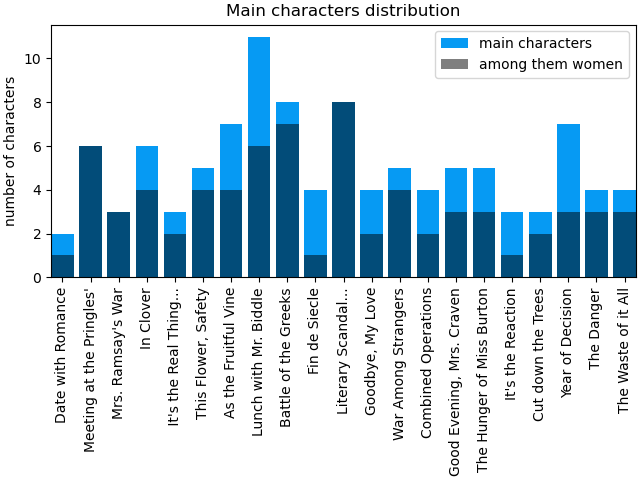

In [ ]:
plt.figure(constrained_layout=True)
plt.bar(titles_for_graphs, characters_table['number of main characters'], color='#069AF3', label='main characters')
plt.bar(titles_for_graphs, characters_table['among them women'], color='black', alpha=0.5, label='among them women')
plt.ylabel('number of characters')
plt.title('Main characters distribution')
plt.xticks(rotation=90)
plt.margins(x=0)
plt.legend()
plt.show()

c:\Users\artem\anaconda3\envs\textanalysis\Lib\site-packages\ipywidgets\widgets\widget.py:503: DeprecationWarning: Passing unrecognized arguments to super(Toolbar).__init__().
NavigationToolbar2WebAgg.__init__() missing 1 required positional argument: 'canvas'
This is deprecated in traitlets 4.2.This error will be raised in a future release of traitlets.
  super().__init__(**kwargs)


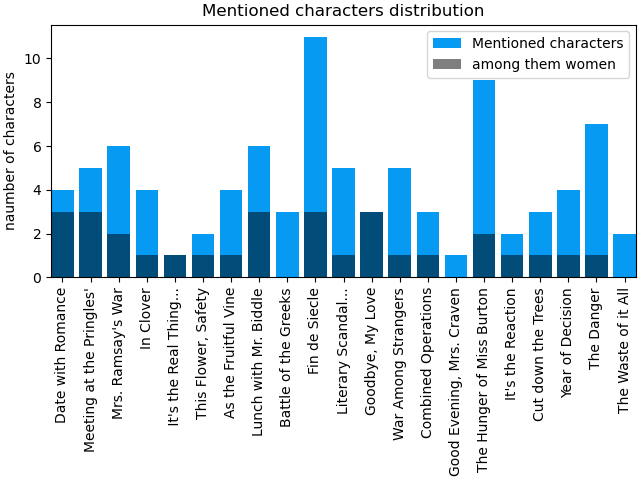

In [ ]:
plt.figure(constrained_layout=True)
plt.bar(titles_for_graphs, characters_table['number of mentioned characters'], color='#069AF3', label='Mentioned characters')
plt.bar(titles_for_graphs, characters_table['...among them women'], color='black', alpha=0.5, label='among them women')
plt.ylabel('naumber of characters')
plt.title('Mentioned characters distribution')
plt.xticks(rotation=90)
plt.margins(x=0)
plt.legend()
plt.show()

#### Appendix

##### Table of Correlations for the Compound Table of Text Metrics

In [ ]:
compound_table

,number of words,number of sentences,number of unique words,number of paragraphs,average word length,average sentence length,average paragraph length in sentences,average paragraph length in words,sentiment negative,sentiment neutral,sentiment positive,sentiment compound,Semantic Domain (number of war related associates),Length of direct speech,Percentage of direct speech,Negative sentiment of direct speech
title,,,,,,,,,,,,,,,,
1. Date with Romance,1301,76,485,22,5.515757,17.118421,3.454545,59.136364,0.057,0.825,0.118,0.9978,10,291,22.367410,0.029
2. Meeting at the Pringles',1624,85,519,36,5.487685,19.105882,2.361111,45.111111,0.075,0.821,0.104,0.9956,15,679,41.810345,0.056
3. Mrs. Ramsay's War,1317,52,481,24,5.599089,25.326923,2.166667,54.875000,0.070,0.822,0.109,0.9937,13,183,13.895216,0.108
4. In Clover,1669,66,564,21,5.517076,25.287879,3.142857,79.476190,0.094,0.789,0.117,0.9939,11,265,15.877771,0.044
5. It's the Real Thing This Time,1281,45,517,9,5.442623,28.466667,5.000000,142.333333,0.100,0.790,0.110,0.9534,19,198,15.456674,0.146
"6. This Flower, Safety",2043,81,715,24,5.641214,25.222222,3.375000,85.125000,0.085,0.818,0.097,0.9865,17,297,14.537445,0.037
7. As the Fruitful Vine,1802,76,625,20,5.502775,23.710526,3.800000,90.100000,0.087,0.765,0.148,0.9988,14,291,16.148724,0.068
8. Lunch with Mr. Biddle,2015,83,721,15,5.711166,24.277108,5.533333,134.333333,0.087,0.747,0.166,0.9996,26,370,18.362283,0.071
9. Battle of the Greeks,1817,81,590,34,5.588332,22.432099,2.382353,53.441176,0.099,0.772,0.128,0.9957,19,954,52.504128,0.114


In [ ]:
compound_table.corr()

,number of words,number of sentences,number of unique words,number of paragraphs,average word length,average sentence length,average paragraph length in sentences,average paragraph length in words,sentiment negative,sentiment neutral,sentiment positive,sentiment compound,Semantic Domain (number of war related associates),Length of direct speech,Percentage of direct speech,Negative sentiment of direct speech
number of words,1.000000,0.888592,0.947972,0.333573,-0.384669,-0.187050,0.492814,0.322247,0.123568,0.015703,-0.094571,0.038917,0.557243,0.210839,-0.184527,-0.154919
number of sentences,0.888592,1.000000,0.760844,0.549015,-0.615609,-0.589954,0.347178,0.043500,-0.132950,0.221136,-0.206003,0.006792,0.341405,0.364915,-0.002071,-0.308348
number of unique words,0.947972,0.760844,1.000000,0.146118,-0.143753,-0.004543,0.592176,0.478705,0.177908,-0.051663,-0.039175,0.077530,0.594699,0.099128,-0.276042,-0.167796
number of paragraphs,0.333573,0.549015,0.146118,1.000000,-0.444134,-0.613926,-0.554105,-0.720441,-0.046838,0.410437,-0.511679,-0.515003,-0.090747,0.806451,0.657568,-0.050372
average word length,-0.384669,-0.615609,-0.143753,-0.444134,1.000000,0.537120,-0.077688,0.138905,0.118718,-0.295611,0.315116,0.100819,0.043368,-0.243024,-0.036266,0.043005
average sentence length,-0.187050,-0.589954,-0.004543,-0.613926,0.537120,1.000000,0.152651,0.524629,0.567661,-0.417116,0.195921,0.002343,0.223919,-0.439024,-0.366490,0.495535
average paragraph length in sentences,0.492814,0.347178,0.592176,-0.554105,-0.077688,0.152651,1.000000,0.917359,0.066516,-0.328348,0.390972,0.406133,0.544290,-0.433475,-0.626414,-0.115687
average paragraph length in words,0.322247,0.043500,0.478705,-0.720441,0.138905,0.524629,0.917359,1.000000,0.302770,-0.455767,0.411214,0.327111,0.563878,-0.530922,-0.656046,0.116293
sentiment negative,0.123568,-0.132950,0.177908,-0.046838,0.118718,0.567661,0.066516,0.302770,1.000000,-0.666771,0.241539,-0.379771,0.582863,0.037322,0.012794,0.425725
sentiment neutral,0.015703,0.221136,-0.051663,0.410437,-0.295611,-0.417116,-0.328348,-0.455767,-0.666771,1.000000,-0.883919,-0.096571,-0.551156,0.266143,0.197722,-0.206130


In [ ]:
final_table = compound_table.copy(deep=True)
final_table = final_table.round(3)
final_table

,number of words,number of sentences,number of unique words,number of paragraphs,average word length,average sentence length,average paragraph length in sentences,average paragraph length in words,sentiment negative,sentiment neutral,sentiment positive,sentiment compound,Semantic Domain (number of war related associates),Length of direct speech,Percentage of direct speech,Negative sentiment of direct speech
title,,,,,,,,,,,,,,,,
1. Date with Romance,1301,76,485,22,5.516,17.118,3.455,59.136,0.057,0.825,0.118,0.998,10,291,22.367,0.029
2. Meeting at the Pringles',1624,85,519,36,5.488,19.106,2.361,45.111,0.075,0.821,0.104,0.996,15,679,41.810,0.056
3. Mrs. Ramsay's War,1317,52,481,24,5.599,25.327,2.167,54.875,0.070,0.822,0.109,0.994,13,183,13.895,0.108
4. In Clover,1669,66,564,21,5.517,25.288,3.143,79.476,0.094,0.789,0.117,0.994,11,265,15.878,0.044
5. It's the Real Thing This Time,1281,45,517,9,5.443,28.467,5.000,142.333,0.100,0.790,0.110,0.953,19,198,15.457,0.146
"6. This Flower, Safety",2043,81,715,24,5.641,25.222,3.375,85.125,0.085,0.818,0.097,0.986,17,297,14.537,0.037
7. As the Fruitful Vine,1802,76,625,20,5.503,23.711,3.800,90.100,0.087,0.765,0.148,0.999,14,291,16.149,0.068
8. Lunch with Mr. Biddle,2015,83,721,15,5.711,24.277,5.533,134.333,0.087,0.747,0.166,1.000,26,370,18.362,0.071
9. Battle of the Greeks,1817,81,590,34,5.588,22.432,2.382,53.441,0.099,0.772,0.128,0.996,19,954,52.504,0.114


In [ ]:
final_table.to_excel(r'C:/Users/artem/Documents/my python projects/Mollie Panter-Downes/final table.xlsx')

In [ ]:
#compound_table.to_csv(r'C:/Users/artem/Documents/my python projects/Mollie Panter-Downes/compound table.csv', sep=';')

In [ ]:
compound_table.to_excel(r'C:/Users/artem/Documents/my python projects/Mollie Panter-Downes/compound table.xlsx')

### References
1. Hutto, Clayton, and Eric Gilbert. "Vader: A parsimonious rule-based model for sentiment analysis of social media text." Proceedings of the international AAAI conference on web and social media. Vol. 8. No. 1. 2014.
2. https://github.com/cjhutto/vaderSentiment
3. https://semdom.org/description 
4. https://semdom.org/v4/4.8.3
5. Blei et al. LDA
6. Topic Modeling Genre: An Exploration of French Classical and Enlightenment Drama

### Similarities


In [ ]:
all_texts = ''
for title in ordered_titles:
    with open(f'Good Evening, Mrs. Craven texts/{title}', encoding='utf-8') as f:
        file = f.read()
    all_texts += file
    

In [ ]:
list_of_sentences = TextAnalyzer(all_texts).text_sent_tokenized()
sents_tokenized = [TextAnalyzer(sent).text_words_tokenized() for sent in list_of_sentences]

In [ ]:
stops = set(stopwords.words('english'))
sents_for_training = []
for sent in sents_tokenized:
    clean_sent = [TextAnalyzer(word).text_lemmatization()[0] for word in sent if word.isalpha() and word not in stops]
    sents_for_training.append(clean_sent)

In [ ]:
sents_for_training

[['date', 'romance'],
 ['october'],
 ['ramsay',
  'dress',
  'lunch',
  'gerald',
  'spalde',
  'mood',
  'fine',
  'old',
  'nostalgia',
  'well',
  'crust',
  'top',
  'five',
  'year',
  'wood'],
 ['take', 'time', 'decide', 'wear'],
 ['good',
  'deal',
  'think',
  'choose',
  'navy',
  'alpaca',
  'suit',
  'crisp',
  'lingerie',
  'blouse',
  'make',
  'look',
  'trim',
  'remember',
  'gerald',
  'say',
  'seem',
  'go',
  'around',
  'protect',
  'invisible',
  'cellophane'],
 ['ramsay',
  'feel',
  'would',
  'tragic',
  'gerald',
  'sit',
  'malaya',
  'five',
  'year',
  'think',
  'woman',
  'london',
  'look',
  'though',
  'protect',
  'invisible',
  'cellophane',
  'face',
  'someone',
  'limp',
  'wilt',
  'lettuce',
  'crumple',
  'chiffon'],
 ['hat', 'bit', 'problem'],
 ['use',
  'woman',
  'skulk',
  'double',
  'terais',
  'gerald',
  'would',
  'possibly',
  'shy',
  'back',
  'alarm',
  'old',
  'love',
  'glimmer',
  'like',
  'submerge',
  'oyster',
  'layer',
  

In [ ]:
all_unique_words = []
for sent in sents_tokenized:
    for word in sent:
        all_unique_words.append(word)
print(len(all_unique_words))
print(len(set(all_unique_words)))

45512
6414


In [ ]:
gensim_model = Word2Vec(sentences = sents_for_training, vector_size=1000, window=5, min_count=1, workers=4)
gensim_model.save("word2vec.model_for_all_texts")

In [ ]:
word = "blitz"
similar_words = gensim_model.wv.most_similar(word, topn=15)  # topn is the number of top similar words you want

for word, score in similar_words:
    print(f"{word}: {score}")

say: 0.7244342565536499
make: 0.723456621170044
look: 0.721764862537384
though: 0.7205624580383301
old: 0.7201738953590393
one: 0.7200304269790649
would: 0.7199056148529053
child: 0.7195137739181519
peters: 0.7191209197044373
come: 0.718890368938446
twistle: 0.7186598777770996
miss: 0.718216598033905
take: 0.7180759310722351
little: 0.7176792621612549
day: 0.7172675728797913


# Sentiment within one story

In [ ]:
with open(f'Good Evening, Mrs. Craven texts/1. Date with Romance.txt', encoding='utf-8') as f:
    proba = f.read()
proba1 = TextAnalyzer(proba)
proba1.text_sentiplot(7)

(array([ 1.        ,  1.00328962,  1.00657924, ..., 75.99342076,
        75.99671038, 76.        ]),
 array([0.47973632, 0.47830554, 0.47687994, ..., 0.54147437, 0.54593848,
        0.55041804]))

c:\Users\artem\anaconda3\envs\textanalysis\Lib\site-packages\ipywidgets\widgets\widget.py:503: DeprecationWarning: Passing unrecognized arguments to super(Toolbar).__init__().
NavigationToolbar2WebAgg.__init__() missing 1 required positional argument: 'canvas'
This is deprecated in traitlets 4.2.This error will be raised in a future release of traitlets.
  super().__init__(**kwargs)


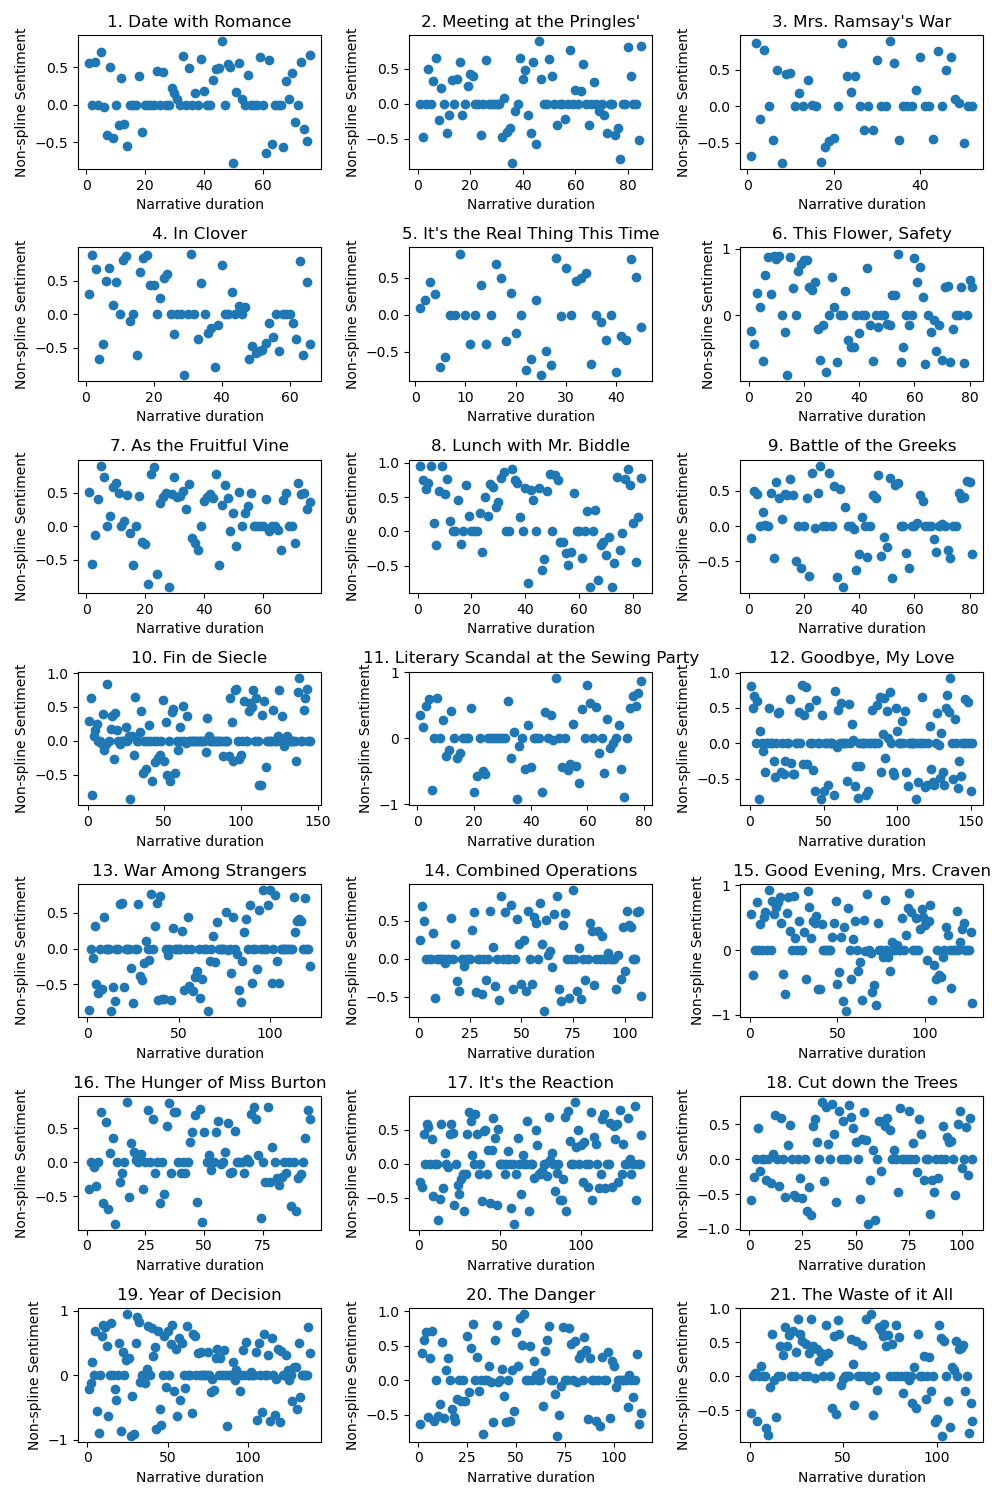

In [ ]:
fig, axes = plt.subplots(nrows=7, ncols=3, figsize=(10, 15))  # figsize is adjusted for visibility
counter = 0
for row in axes:
    for ax in row:
        story = TextAnalyzer(all_texts_as_str[counter][:-4])
        data = story.text_rawsentiplot()
        ax.scatter(data[1], data[0])
        ax.set_title(f'{ordered_titles[counter][:-4]}')
        ax.set_xlabel('Narrative duration')
        ax.set_ylabel('Non-spline Sentiment')
        counter += 1
    counter = counter
    

plt.tight_layout()
#plt.savefig('Sentiments.png')
plt.show()

c:\Users\artem\anaconda3\envs\textanalysis\Lib\site-packages\ipywidgets\widgets\widget.py:503: DeprecationWarning: Passing unrecognized arguments to super(Toolbar).__init__().
NavigationToolbar2WebAgg.__init__() missing 1 required positional argument: 'canvas'
This is deprecated in traitlets 4.2.This error will be raised in a future release of traitlets.
  super().__init__(**kwargs)


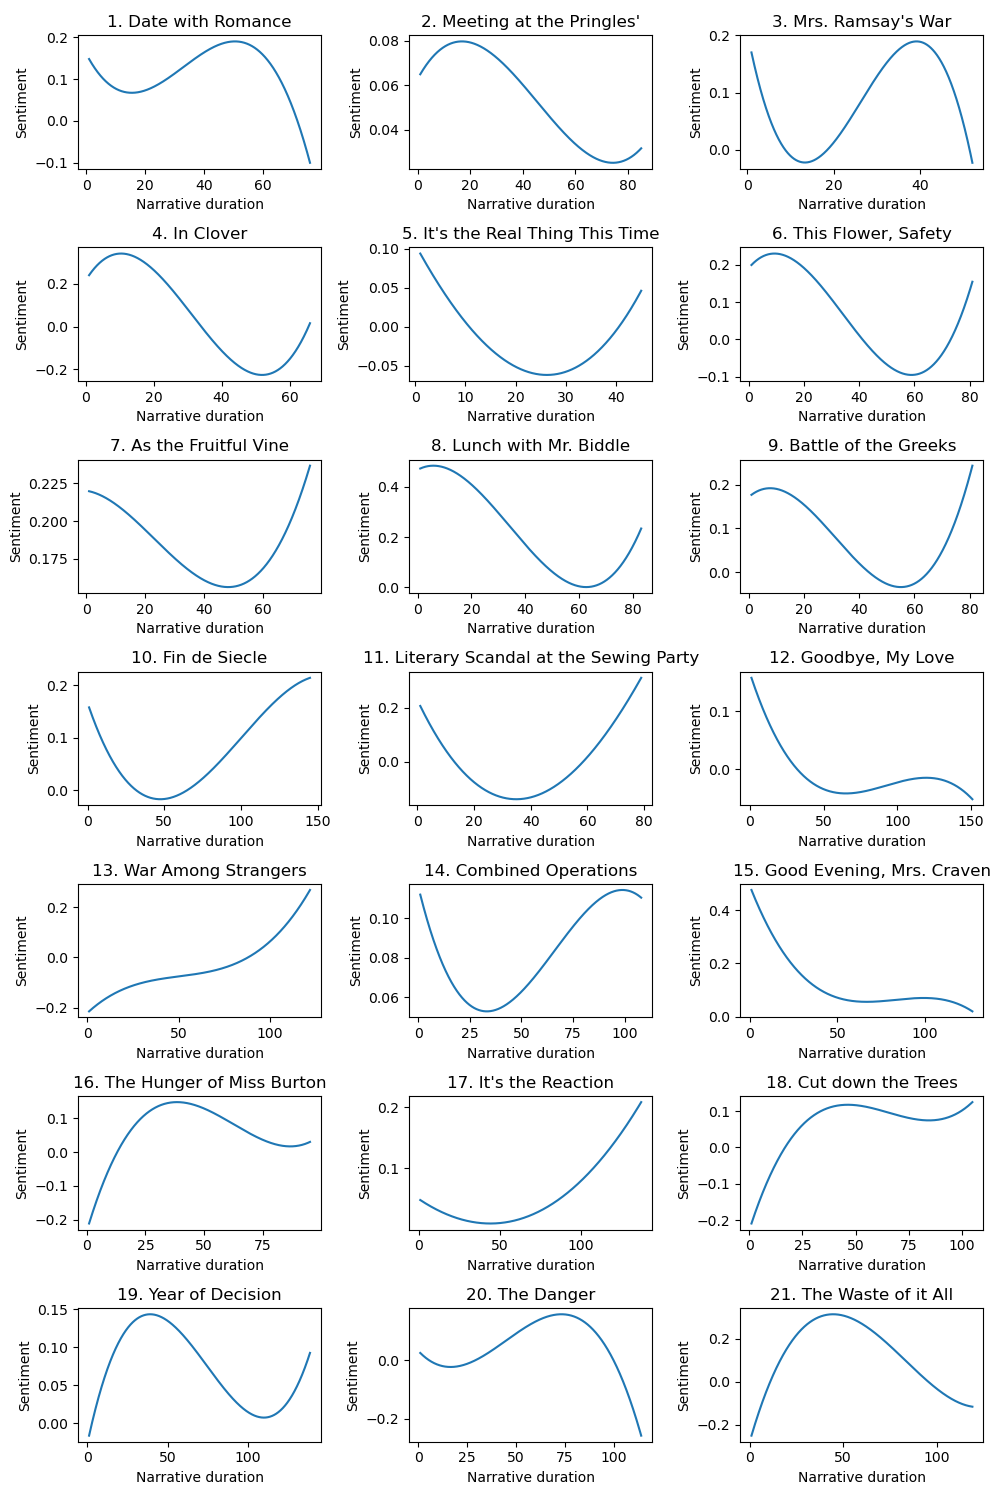

In [ ]:
fig, axes = plt.subplots(nrows=7, ncols=3, figsize=(10, 15))  # figsize is adjusted for visibility
counter = 0
for row in axes:
    for ax in row:
        story = TextAnalyzer(all_texts_as_str[counter][:-4])
        data = story.text_sentiplot(30)
        ax.plot(data[0], data[1])
        ax.set_title(f'{ordered_titles[counter][:-4]}')
        ax.set_xlabel('Narrative duration')
        ax.set_ylabel('Sentiment')
        counter += 1
    counter = counter
    

plt.tight_layout()
plt.savefig('Sentiments.png')
plt.show()

In [ ]:
for i in range(len(all_texts_as_str)): # search for Blitz
    story = TextAnalyzer(all_texts_as_str[i])
    tokens = story.text_words_tokenized()
    if 'bomber' in tokens:
        print(i)

5


In [ ]:
from nltk.corpus import wordnet as wn
wn.synsets('bomb')

[Synset('bomb.n.01'),
 Synset('bomb_calorimeter.n.01'),
 Synset('turkey.n.05'),
 Synset('bombard.v.02'),
 Synset('fail.v.07')]